Epoch 1/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6004 - loss: 0.6700 - val_accuracy: 0.6518 - val_loss: 0.6307
Epoch 2/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6429 - loss: 0.6508 - val_accuracy: 0.6753 - val_loss: 0.6179
Epoch 3/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6625 - loss: 0.6317 - val_accuracy: 0.6642 - val_loss: 0.6105
Epoch 4/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6776 - loss: 0.6213 - val_accuracy: 0.6674 - val_loss: 0.6046
Epoch 5/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6722 - loss: 0.6156 - val_accuracy: 0.6757 - val_loss: 0.5989
Epoch 6/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6812 - loss: 0.6018 - val_accuracy: 0.7011 - val_loss: 0.5976
Epoch 7/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6880 - loss: 0.5930 - val_accuracy: 0.7020 - val_loss: 0.5940
Epoch 8/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6756 - loss: 0.5923 - val_accuracy: 0.6757 - val_loss

Epoch 52/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8120 - loss: 0.3891 - val_accuracy: 0.8326 - val_loss: 0.3325
Epoch 53/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8053 - loss: 0.3887 - val_accuracy: 0.8201 - val_loss: 0.3278
Epoch 54/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8153 - loss: 0.3772 - val_accuracy: 0.8289 - val_loss: 0.3272
Epoch 55/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8127 - loss: 0.3798 - val_accuracy: 0.8326 - val_loss: 0.3198
Epoch 56/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8142 - loss: 0.3757 - val_accuracy: 0.8312 - val_loss: 0.3274
Epoch 57/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8213 - loss: 0.3620 - val_accuracy: 0.8399 - val_loss: 0.3199
Epoch 58/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8106 - loss: 0.3858 - val_accuracy: 0.8404 - val_loss: 0.3189
Epoch 59/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 0.3826 - val_accuracy: 0.8404 - v

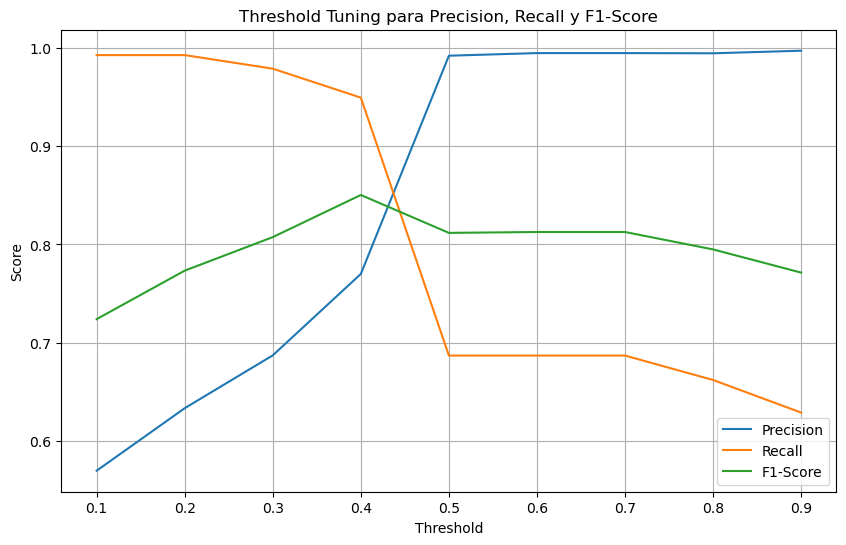

Mejor umbral basado en F1-Score: 0.4
Precision con umbral óptimo: 0.7699775952203136
Recall con umbral óptimo: 0.9493554327808471
F1-Score con umbral óptimo: 0.8503092783505155


In [357]:
#threshold tuning
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Crear la columna thresholdtuning basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['thresholdtuning'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos pCA
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['thresholdtuning']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=64, verbose=1)

# Predecir las probabilidades del conjunto de prueba
y_pred_prob = model.predict(X_test)

# Implementar Threshold Tuning
thresholds = np.linspace(0.1, 0.9, 9)  # Diferentes umbrales
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_classes = (y_pred_prob[:, 1] >= threshold).astype(int)
    precision = precision_score(y_test.argmax(axis=1), y_pred_classes)
    recall = recall_score(y_test.argmax(axis=1), y_pred_classes)
    f1 = f1_score(y_test.argmax(axis=1), y_pred_classes)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Graficar las métricas en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning para Precision, Recall y F1-Score')
plt.legend()
plt.grid()
plt.show()

# Seleccionar el mejor umbral basado en el F1-Score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Mejor umbral basado en F1-Score: {best_threshold}")

# Recalcular métricas con el mejor umbral
y_pred_classes_best = (y_pred_prob[:, 1] >= best_threshold).astype(int)
final_precision = precision_score(y_test.argmax(axis=1), y_pred_classes_best)
final_recall = recall_score(y_test.argmax(axis=1), y_pred_classes_best)
final_f1 = f1_score(y_test.argmax(axis=1), y_pred_classes_best)

print(f"Precision con umbral óptimo: {final_precision}")
print(f"Recall con umbral óptimo: {final_recall}")
print(f"F1-Score con umbral óptimo: {final_f1}")
